**Install library Sastrawi dan textblob**

In [27]:
!pip install sastrawi
!pip install textblob
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

**Import Library dan connect Dataset**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
import nltk
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud


data = pd.read_csv("/content/Reklamasi_pantai_makassar.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  800 non-null    object
 1   date                800 non-null    object
 2   author              800 non-null    object
 3   text                800 non-null    object
 4   type                800 non-null    object
 5   author_channel_url  800 non-null    object
 6   author_channel_id   800 non-null    object
 7   edited_date         800 non-null    object
 8   parent_post_id      528 non-null    object
 9   parent_username     528 non-null    object
 10  direct_reply_to     279 non-null    object
 11  likes               800 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 75.1+ KB


In [15]:
data.drop_duplicates(subset="text", keep = "first", inplace = True)

df = pd.DataFrame(data['text'])
df.head(5)

,text
0,Jujur saya orang sulawesi selatan yg sebenarny...
1,"Ia, biasanya proyek blm jalan para oknum pejab..."
2,Tes
3,hahaha itu gedung kembar kalau gak di bangun b...
4,dengan rate kemajuan kek gini 1-2 dekade lagi ...


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 799
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  779 non-null    object
 1   date                779 non-null    object
 2   author              779 non-null    object
 3   text                779 non-null    object
 4   type                779 non-null    object
 5   author_channel_url  779 non-null    object
 6   author_channel_id   779 non-null    object
 7   edited_date         779 non-null    object
 8   parent_post_id      509 non-null    object
 9   parent_username     509 non-null    object
 10  direct_reply_to     263 non-null    object
 11  likes               779 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 79.1+ KB


In [17]:
def remove_URL(tweet):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', str(tweet))

def remove_html(tweet):
  html = re.compile(r'<.*?')
  return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_number(tweet):
  tweet = re.sub(r'\d+','',tweet)
  return tweet

def remove_symbols(tweet):
  tweet = re.sub(r'[^a-zA-Z0-9\s]','', tweet)
  return tweet

df['cleansing']=df['text'].apply(lambda x: remove_URL(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_number(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_symbols(x))

df.head(10)

,text,cleansing
0,Jujur saya orang sulawesi selatan yg sebenarny...,Jujur saya orang sulawesi selatan yg sebenarny...
1,"Ia, biasanya proyek blm jalan para oknum pejab...",Ia biasanya proyek blm jalan para oknum pejaba...
2,Tes,Tes
3,hahaha itu gedung kembar kalau gak di bangun b...,hahaha itu gedung kembar kalau gak di bangun b...
4,dengan rate kemajuan kek gini 1-2 dekade lagi ...,dengan rate kemajuan kek gini dekade lagi jak...
5,"Yang namanya orang membangun, ada aja lah yang...",Yang namanya orang membangun ada aja lah yang ...
6,harusnya gedung tinggi banyak di Makassar karn...,harusnya gedung tinggi banyak di Makassar karn...
7,Pembangunan akan terbengkalai jika dipegang ol...,Pembangunan akan terbengkalai jika dipegang ol...
8,Jadi inget awal2 reklamasi ini jalannya mulus2...,Jadi inget awal reklamasi ini jalannya mulus d...
9,"Kangen kota maksar sejak 2004,sampai 2017.Kini...",Kangen kota maksar sejak sampai Kini sekarang ...


In [18]:
def case_folding(text):
  if isinstance(text,str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text
df['case_folding']=df['cleansing'].apply(case_folding)

df.head(10)

,text,cleansing,case_folding
0,Jujur saya orang sulawesi selatan yg sebenarny...,Jujur saya orang sulawesi selatan yg sebenarny...,jujur saya orang sulawesi selatan yg sebenarny...
1,"Ia, biasanya proyek blm jalan para oknum pejab...",Ia biasanya proyek blm jalan para oknum pejaba...,ia biasanya proyek blm jalan para oknum pejaba...
2,Tes,Tes,tes
3,hahaha itu gedung kembar kalau gak di bangun b...,hahaha itu gedung kembar kalau gak di bangun b...,hahaha itu gedung kembar kalau gak di bangun b...
4,dengan rate kemajuan kek gini 1-2 dekade lagi ...,dengan rate kemajuan kek gini dekade lagi jak...,dengan rate kemajuan kek gini dekade lagi jak...
5,"Yang namanya orang membangun, ada aja lah yang...",Yang namanya orang membangun ada aja lah yang ...,yang namanya orang membangun ada aja lah yang ...
6,harusnya gedung tinggi banyak di Makassar karn...,harusnya gedung tinggi banyak di Makassar karn...,harusnya gedung tinggi banyak di makassar karn...
7,Pembangunan akan terbengkalai jika dipegang ol...,Pembangunan akan terbengkalai jika dipegang ol...,pembangunan akan terbengkalai jika dipegang ol...
8,Jadi inget awal2 reklamasi ini jalannya mulus2...,Jadi inget awal reklamasi ini jalannya mulus d...,jadi inget awal reklamasi ini jalannya mulus d...
9,"Kangen kota maksar sejak 2004,sampai 2017.Kini...",Kangen kota maksar sejak sampai Kini sekarang ...,kangen kota maksar sejak sampai kini sekarang ...


In [19]:
def tokenize(text):
    if isinstance(text, str):
        tokens = text.split()
        return tokens
    return []

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(10)

,text,cleansing,case_folding,tokenize
0,Jujur saya orang sulawesi selatan yg sebenarny...,Jujur saya orang sulawesi selatan yg sebenarny...,jujur saya orang sulawesi selatan yg sebenarny...,"[jujur, saya, orang, sulawesi, selatan, yg, se..."
1,"Ia, biasanya proyek blm jalan para oknum pejab...",Ia biasanya proyek blm jalan para oknum pejaba...,ia biasanya proyek blm jalan para oknum pejaba...,"[ia, biasanya, proyek, blm, jalan, para, oknum..."
2,Tes,Tes,tes,[tes]
3,hahaha itu gedung kembar kalau gak di bangun b...,hahaha itu gedung kembar kalau gak di bangun b...,hahaha itu gedung kembar kalau gak di bangun b...,"[hahaha, itu, gedung, kembar, kalau, gak, di, ..."
4,dengan rate kemajuan kek gini 1-2 dekade lagi ...,dengan rate kemajuan kek gini dekade lagi jak...,dengan rate kemajuan kek gini dekade lagi jak...,"[dengan, rate, kemajuan, kek, gini, dekade, la..."
5,"Yang namanya orang membangun, ada aja lah yang...",Yang namanya orang membangun ada aja lah yang ...,yang namanya orang membangun ada aja lah yang ...,"[yang, namanya, orang, membangun, ada, aja, la..."
6,harusnya gedung tinggi banyak di Makassar karn...,harusnya gedung tinggi banyak di Makassar karn...,harusnya gedung tinggi banyak di makassar karn...,"[harusnya, gedung, tinggi, banyak, di, makassa..."
7,Pembangunan akan terbengkalai jika dipegang ol...,Pembangunan akan terbengkalai jika dipegang ol...,pembangunan akan terbengkalai jika dipegang ol...,"[pembangunan, akan, terbengkalai, jika, dipega..."
8,Jadi inget awal2 reklamasi ini jalannya mulus2...,Jadi inget awal reklamasi ini jalannya mulus d...,jadi inget awal reklamasi ini jalannya mulus d...,"[jadi, inget, awal, reklamasi, ini, jalannya, ..."
9,"Kangen kota maksar sejak 2004,sampai 2017.Kini...",Kangen kota maksar sejak sampai Kini sekarang ...,kangen kota maksar sejak sampai kini sekarang ...,"[kangen, kota, maksar, sejak, sampai, kini, se..."


In [20]:
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['filtering/stopword removal'] = df ['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,cleansing,case_folding,tokenize,filtering/stopword removal
0,Jujur saya orang sulawesi selatan yg sebenarny...,Jujur saya orang sulawesi selatan yg sebenarny...,jujur saya orang sulawesi selatan yg sebenarny...,"[jujur, saya, orang, sulawesi, selatan, yg, se...","[jujur, orang, sulawesi, selatan, yg, menyetuj..."
1,"Ia, biasanya proyek blm jalan para oknum pejab...",Ia biasanya proyek blm jalan para oknum pejaba...,ia biasanya proyek blm jalan para oknum pejaba...,"[ia, biasanya, proyek, blm, jalan, para, oknum...","[proyek, blm, jalan, oknum, pejabat, berdebat,..."
2,Tes,Tes,tes,[tes],[tes]
3,hahaha itu gedung kembar kalau gak di bangun b...,hahaha itu gedung kembar kalau gak di bangun b...,hahaha itu gedung kembar kalau gak di bangun b...,"[hahaha, itu, gedung, kembar, kalau, gak, di, ...","[hahaha, gedung, kembar, gak, bangun, bikin, m..."
4,dengan rate kemajuan kek gini 1-2 dekade lagi ...,dengan rate kemajuan kek gini dekade lagi jak...,dengan rate kemajuan kek gini dekade lagi jak...,"[dengan, rate, kemajuan, kek, gini, dekade, la...","[rate, kemajuan, kek, gini, dekade, jakarta, p..."
5,"Yang namanya orang membangun, ada aja lah yang...",Yang namanya orang membangun ada aja lah yang ...,yang namanya orang membangun ada aja lah yang ...,"[yang, namanya, orang, membangun, ada, aja, la...","[namanya, orang, membangun, aja, ga, suka, pak..."
6,harusnya gedung tinggi banyak di Makassar karn...,harusnya gedung tinggi banyak di Makassar karn...,harusnya gedung tinggi banyak di makassar karn...,"[harusnya, gedung, tinggi, banyak, di, makassa...","[gedung, makassar, karna, pertumbuhan, ekonomi..."
7,Pembangunan akan terbengkalai jika dipegang ol...,Pembangunan akan terbengkalai jika dipegang ol...,pembangunan akan terbengkalai jika dipegang ol...,"[pembangunan, akan, terbengkalai, jika, dipega...","[pembangunan, terbengkalai, dipegang, pt, wask..."
8,Jadi inget awal2 reklamasi ini jalannya mulus2...,Jadi inget awal reklamasi ini jalannya mulus d...,jadi inget awal reklamasi ini jalannya mulus d...,"[jadi, inget, awal, reklamasi, ini, jalannya, ...","[inget, reklamasi, jalannya, mulus, diawal, tu..."
9,"Kangen kota maksar sejak 2004,sampai 2017.Kini...",Kangen kota maksar sejak sampai Kini sekarang ...,kangen kota maksar sejak sampai kini sekarang ...,"[kangen, kota, maksar, sejak, sampai, kini, se...","[kangen, kota, maksar, kampung, halaman, labua..."


In [21]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming_data']= df['filtering/stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

df.head(10)

df.to_csv('Hasil-preprocessing-data.csv', encoding='utf8', index=False)

In [22]:
def load_data():
  data = pd.read_csv('/content/Hasil-preprocessing-data.csv')
  return data

data = load_data()
data.head(4)

data.info()

df = pd.DataFrame(data['stemming_data'])
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   text                        779 non-null    object
 1   cleansing                   770 non-null    object
 2   case_folding                770 non-null    object
 3   tokenize                    779 non-null    object
 4   filtering/stopword removal  779 non-null    object
 5   stemming_data               765 non-null    object
dtypes: object(6)
memory usage: 36.6+ KB


,stemming_data
0,jujur orang sulawesi selatan yg tuju bangun yg...
1,proyek blm jalan oknum jabat debat komisi kl g...
2,tes
3,hahaha gedung kembar gak bangun bikin malu kar...
4,rate maju kek gin dekade jakarta pelan dikalah...
5,nama orang bangun aja ga suka pake alas inti k...
6,gedung makassar karna tumbuh ekonomi bangga an...
7,bangun bengkalai pegang pt waskita karya
8,inget reklamasi jalan mulus awal tuh imingi ma...
9,kangen kota maksar kampung halaman labu bajo f...


**Labeling**

In [23]:
labels = []
scores = []

for text in df['stemming_data'].astype(str):
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity

  if polarity > 0:
    label = 'positif'
  elif polarity < 0:
    label = 'negatif'
  else:
    label ='netral'

  scores.append(polarity)
  labels.append(label)

df['sentiment_score'] = scores
df['sentiment'] = labels

data = ['stemming_data', 'sentiment_score', 'sentiment']
data = df[data]

data.head(10)

,stemming_data,sentiment_score,sentiment
0,jujur orang sulawesi selatan yg tuju bangun yg...,0.0,netral
1,proyek blm jalan oknum jabat debat komisi kl g...,0.0,netral
2,tes,0.0,netral
3,hahaha gedung kembar gak bangun bikin malu kar...,0.2,positif
4,rate maju kek gin dekade jakarta pelan dikalah...,0.0,netral
5,nama orang bangun aja ga suka pake alas inti k...,-0.4,negatif
6,gedung makassar karna tumbuh ekonomi bangga an...,0.0,netral
7,bangun bengkalai pegang pt waskita karya,0.0,netral
8,inget reklamasi jalan mulus awal tuh imingi ma...,0.0,netral
9,kangen kota maksar kampung halaman labu bajo f...,1.0,positif


<ipython-input-24-5317680116a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


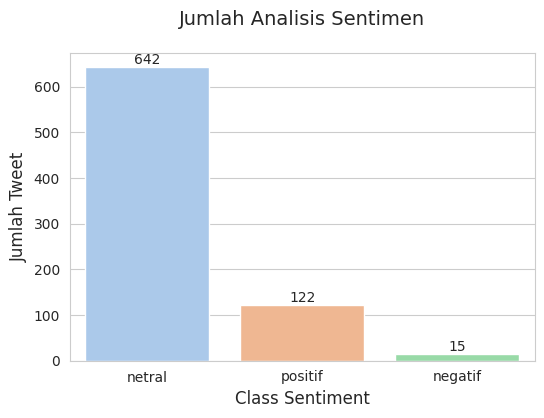

In [24]:
sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

In [25]:
data.to_csv('Hasil_textblob.csv', encoding='utf8', index=False)

In [41]:
#load data
data = pd.read_csv("/content/Hasil_textblob.csv")

# Display the first few rows of the dataset
data.head()

,stemming_data,sentiment_score,sentiment
0,jujur orang sulawesi selatan yg tuju bangun yg...,0.0,netral
1,proyek blm jalan oknum jabat debat komisi kl g...,0.0,netral
2,tes,0.0,netral
3,hahaha gedung kembar gak bangun bikin malu kar...,0.2,positif
4,rate maju kek gin dekade jakarta pelan dikalah...,0.0,netral


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stemming_data    765 non-null    object 
 1   sentiment_score  779 non-null    float64
 2   sentiment        779 non-null    object 
dtypes: float64(1), object(2)
memory usage: 18.4+ KB


In [36]:
# Ensure there are no missing values
data = data.dropna()

In [37]:
# Print the shape of the dataframe to check if any rows were dropped
print("Hasil dataframe setelah drop missing value :", data.shape)

Hasil dataframe setelah drop missing value : (765, 3)


In [47]:
# Distribution of reviews in each sentiment category

sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
netral     566
positif    122
negatif     15
Name: count, dtype: int64


In [51]:
#Check the phrase length of each of the movie reviews

data['Review_len'] = [len(t) for t in data.stemming_data]
data.head(4)

,stemming_data,sentiment_score,sentiment,Review_len
0,jujur orang sulawesi selatan yg tuju bangun yg...,0.0,netral,242
1,proyek blm jalan oknum jabat debat komisi kl g...,0.0,netral,170
2,tes,0.0,netral,3
3,hahaha gedung kembar gak bangun bikin malu kar...,0.2,positif,68


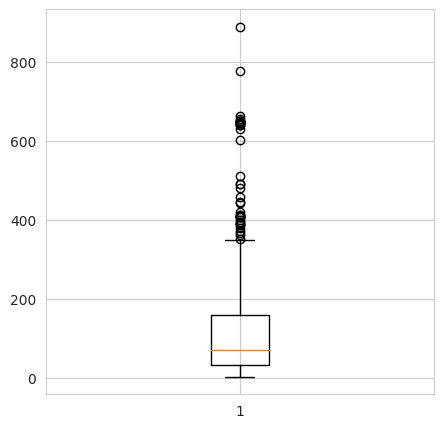

In [53]:
#Overall Distribution of the length of the reviews under each sentiment class

fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(data.Review_len)
plt.show()

In [54]:
data[data.Review_len > 200].head()

,stemming_data,sentiment_score,sentiment,Review_len
0,jujur orang sulawesi selatan yg tuju bangun yg...,0.0,netral,242
9,kangen kota maksar kampung halaman labu bajo f...,1.0,positif,210
12,reklamasi jakarta inisiatif inisiatif naga sem...,0.0,netral,234
36,iya makassar biasa pakai campur semen buat yai...,0.0,netral,207
48,indah makassar rusak lingkung reklamasi datar ...,0.0,netral,235


In [57]:
#Filtering out negatif reviews

neg_review = data[data['sentiment'] == 'negatif']
neg_words =[]
for t in neg_review.stemming_data:
    neg_words.append(t)
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'nama orang bangun aja ga suka pake alas inti klo orang udah ga suka ga benernya so muutuu bi ghadhaa'

In [58]:
#Filtering out positif reviews

pos_review = data[data['sentiment'] == 'positif']
pos_words =[]
for t in pos_review.stemming_data:
    pos_words.append(t)
pos_text = pd.Series(pos_words).str.cat(sep=' ')
pos_text[:100]

'hahaha gedung kembar gak bangun bikin malu karna berita nya malaysia kangen kota maksar kampung hala'

In [59]:
#Filtering out netral reviews

net_review = data[data['sentiment'] == 'netral']
net_words =[]
for t in net_review.stemming_data:
    net_words.append(t)
net_text = pd.Series(net_words).str.cat(sep=' ')
net_text[:100]

'jujur orang sulawesi selatan yg tuju bangun yg timbul laut karna indah kawasankarna kasihan yg hidup'

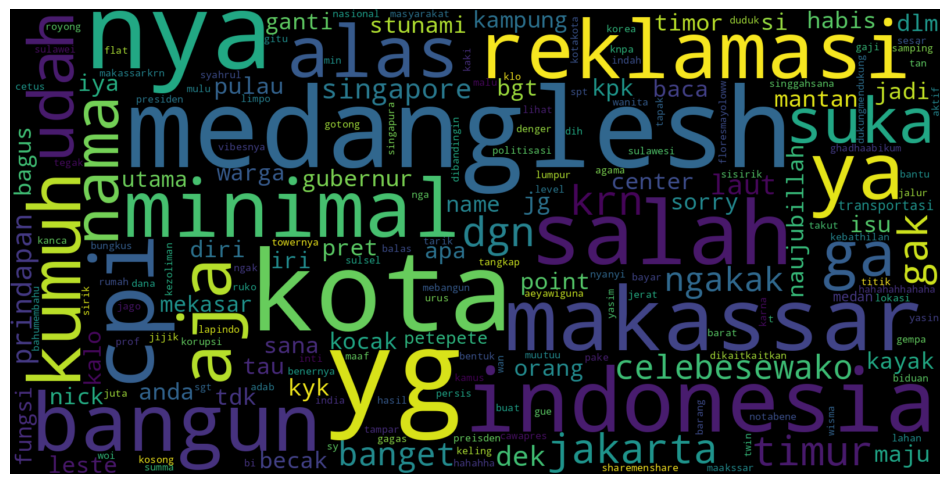

In [60]:
#Word Cloud for negatif review

from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [61]:
from collections import Counter
tokens = neg_text.split()  # Split the text into individual words
# Count the frequency of each word
word_freq = Counter(tokens)
# Sort the words based on their frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# Print the top 10 words and their frequencies
print("Top 10 kata negatif dan jumlahnya:")
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

Top 10 kata negatif dan jumlahnya:
yg: 11
kota: 10
medanglesh: 10
nya: 9
makassar: 6
salah: 6
cpi: 6
indonesia: 6
bangun: 5
reklamasi: 5


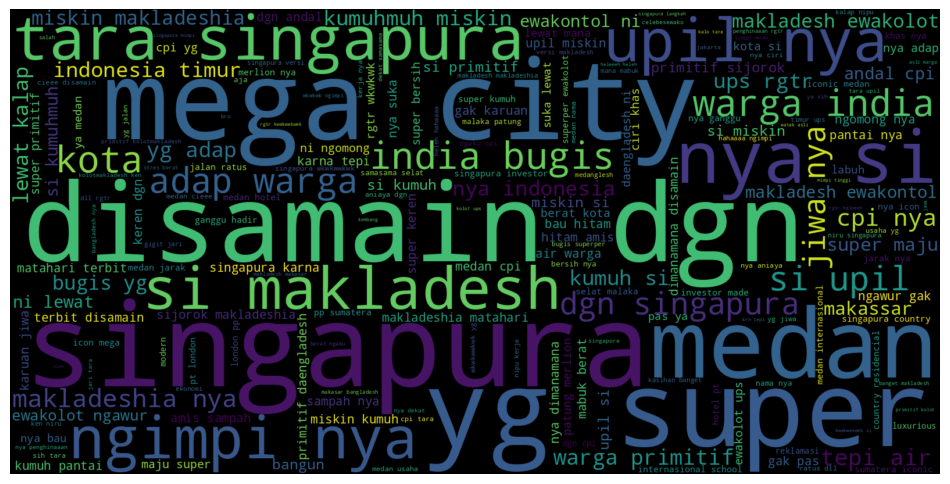

In [62]:
#Word Cloud for positif review

from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
from collections import Counter
tokens = pos_text.split()  # Split the text into individual words
# Count the frequency of each word
word_freq = Counter(tokens)
# Sort the words based on their frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# Print the top 10 words and their frequencies
print("Top 10 kata positif dan jumlahnya:")
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

Top 10 kata positif dan jumlahnya:
nya: 341
singapura: 231
medan: 167
yg: 148
si: 144
of: 141
dgn: 114
super: 95
the: 88
warga: 81


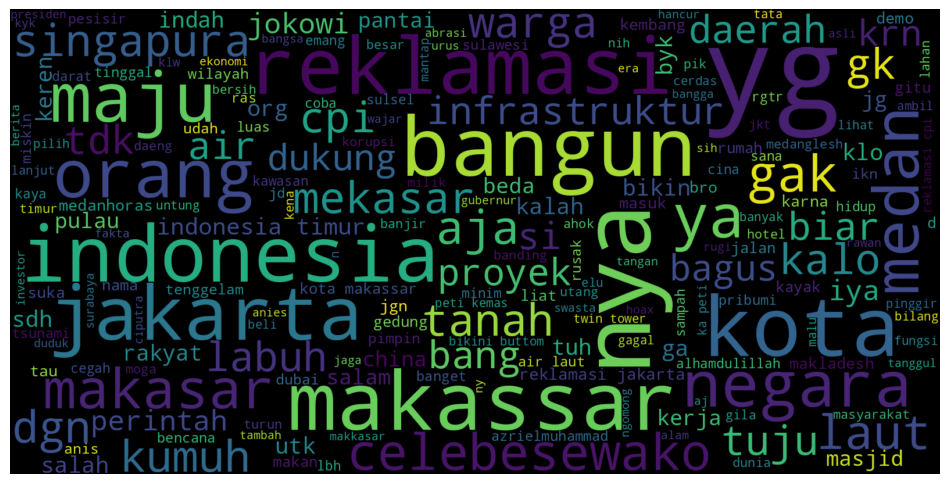

In [64]:
#Word Cloud for netral review

from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(net_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
from collections import Counter
tokens = net_text.split()  # Split the text into individual words
# Count the frequency of each word
word_freq = Counter(tokens)
# Sort the words based on their frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# Print the top 10 words and their frequencies
print("Top 10 kata netral dan jumlahnya:")
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

Top 10 kata netral dan jumlahnya:
yg: 205
nya: 139
reklamasi: 110
kota: 109
makassar: 106
indonesia: 104
jakarta: 96
bangun: 94
maju: 69
orang: 66


In [68]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(data['stemming_data'], data['sentiment'], test_size=0.2, random_state=42)

In [67]:
# Initialize Sastrawi stopword remover

stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

In [69]:
# Preprocess the text data by removing stopwords

X_train = X_train.apply(lambda x: stopword_remover.remove(x))
X_test = X_test.apply(lambda x: stopword_remover.remove(x))

In [70]:
# Extract TF-IDF features
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [71]:
# Convert the TF-IDF matrix to a DataFrame for better visualization

tfidf_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [72]:
# Display the first few rows of the TF-IDF DataFrame

print("TF-IDF features for the training data:")
print(tfidf_train_df.head())

TF-IDF features for the training data:
   aamiin  aasing  abah  abdi  abdul  abdullah  abg  abrasi  abrasijangan  \
0     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   
1     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   
2     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   
3     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   
4     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   

    ad  ...        yg  ygtdk  yohanes  yoi  youtube  yuor  zaman  zanamnya  \
0  0.0  ...  0.000000    0.0      0.0  0.0      0.0   0.0    0.0       0.0   
1  0.0  ...  0.000000    0.0      0.0  0.0      0.0   0.0    0.0       0.0   
2  0.0  ...  0.116389    0.0      0.0  0.0      0.0   0.0    0.0       0.0   
3  0.0  ...  0.093062    0.0      0.0  0.0      0.0   0.0    0.0       0.0   
4  0.0  ...  0.000000    0.0      0.0  0.0      0.0   0.0    0.0       0.0   

   zat  zulfat  
0  0.0     0

In [73]:
print("TF-IDF features for the test data:")
print(tfidf_test_df.head())

TF-IDF features for the test data:
   aamiin  aasing  abah  abdi  abdul  abdullah  abg  abrasi  abrasijangan  \
0     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   
1     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   
2     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   
3     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   
4     0.0     0.0   0.0   0.0    0.0       0.0  0.0     0.0           0.0   

    ad  ...        yg  ygtdk  yohanes  yoi  youtube  yuor  zaman  zanamnya  \
0  0.0  ...  0.110248    0.0      0.0  0.0      0.0   0.0    0.0       0.0   
1  0.0  ...  0.000000    0.0      0.0  0.0      0.0   0.0    0.0       0.0   
2  0.0  ...  0.000000    0.0      0.0  0.0      0.0   0.0    0.0       0.0   
3  0.0  ...  0.000000    0.0      0.0  0.0      0.0   0.0    0.0       0.0   
4  0.0  ...  0.152418    0.0      0.0  0.0      0.0   0.0    0.0       0.0   

   zat  zulfat  
0  0.0     0.0  

In [74]:
# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [75]:
# Predict the sentiments on the test set
y_pred = svm.predict(X_test_tfidf)

In [76]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9219858156028369


In [77]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         4
      netral       0.92      0.99      0.95       115
     positif       0.94      0.73      0.82        22

    accuracy                           0.92       141
   macro avg       0.62      0.57      0.59       141
weighted avg       0.90      0.92      0.91       141



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# Show the original text and predicted sentiment
predicted_data = pd.DataFrame({'Original_Text': X_test, 'Predicted_Sentiment': y_pred})

In [79]:
# Display the first few rows of the DataFrame with predictions
print(predicted_data.head())

                                         Original_Text Predicted_Sentiment
495  rgtr wkwkwk si timur makladesh ngences alias n...             positif
164                          isi orang indonesia orang              netral
54                     salam kenal kota daeng makassar              netral
582  medanhoras biar mekasar ewakontol loh laut bik...              netral
608  celebesewako makassar aman boss dgn kota smart...              netral
